In [1]:
import spacy
import spacy.cli
# deutsche sprachpakete
# 1. Schritt spacy download
# spacy.cli.download("de_core_news_lg")
# spacy.cli.download("de_core_news_md")
from spacy.language import Language
from spacy_language_detection import LanguageDetector
import plotly.graph_objects as go
import plotly.express as px
from wordcloud import WordCloud
# pip install PIL
import matplotlib.pyplot as plt
import pytextrank
from spacy_sentiws import spaCySentiWS

In [2]:
import pandas as pd

In [105]:
df = pd.read_csv('../data/dataset_cleaned_file_v6.csv')

In [62]:
df

,genre,interpret,album,release_year,songtitle,decade,song_id,full_title,release_date_components_raw,release_date_for_display,stats_raw,lyrics,weekday,word_count
0,NaN,Adel Tawil,NaN,2023,Fenster,0,9061124,Fenster by Adel Tawil,"{'year': 2023, 'month': 4, 'day': 28}",2023-04-28,"{'unreviewed_annotations': 0, 'hot': False}",Sitze an mei'm offenen Fenster Warte drauf d...,Friday,127
1,NaN,Adel Tawil,NaN,2023,Venus & Mars,0,8616439,Venus & Mars by Adel Tawil,"{'year': 2023, 'month': 3, 'day': 3}",2023-03-03,"{'unreviewed_annotations': 0, 'hot': False}",Nur einmal Wir sind Venus und Mars Einhunde...,Friday,100
2,NaN,Adel Tawil,NaN,2023,Spiegelbild,0,8616443,Spiegelbild by Adel Tawil,"{'year': 2023, 'month': 3, 'day': 3}",2023-03-03,"{'unreviewed_annotations': 0, 'hot': False}","Wie konnt ich glauben, dass es gut ist Dass ...",Friday,77
3,NaN,Adel Tawil,NaN,2023,Nirvana,0,8616448,Nirvana by Adel Tawil,"{'year': 2023, 'month': 3, 'day': 3}",2023-03-03,"{'unreviewed_annotations': 0, 'hot': False}",Fahr' auf endlosen Straßen Weiter Richtung N...,Friday,147
4,NaN,Adel Tawil,NaN,2023,Leuchten,0,8616445,Leuchten by Adel Tawil,"{'year': 2023, 'month': 3, 'day': 3}",2023-03-03,"{'unreviewed_annotations': 0, 'hot': False}",Wir hatten nur die größten Zeiten In jedem n...,Friday,78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7785,Schlager,Wolfgang Petry,Achterbahn,2001,Du hast mein Herz geklaut,2000,716319,Du hast mein Herz geklaut by Wolfgang Petry,NaN,NaN,"{'unreviewed_annotations': 0, 'hot': False}",Die Luft ist raus - ich glaub nicht mehr an W...,NaN,53
7786,Schlager,Wolfgang Petry,Achterbahn,2001,Leg dein Gesicht an mein Gesicht,2000,716326,Leg dein Gesicht an mein Gesicht by Wolfgang P...,NaN,NaN,"{'unreviewed_annotations': 0, 'hot': False}",Du wolltest deine Freiheit haben Nun stehst d...,NaN,51
7787,Schlager,Wolfgang Petry,Achterbahn,2001,Scheisse ist braun,2000,716331,Scheisse ist braun by Wolfgang Petry,NaN,NaN,"{'unreviewed_annotations': 0, 'hot': False}","Wenn die Sonne untergeht in der Provinz, ho h...",NaN,94
7788,Schlager,Wolfgang Petry,Kein Grund zur Panik,2003,Jetzt oder nie,2000,1447255,Mit offenen Armen by Wolfgang Petry,NaN,NaN,"{'unreviewed_annotations': 0, 'hot': False}",Wolfgang Petry - Anfang Vom Ende Lyrics Briefe...,NaN,50


In [33]:
df.value_counts('genre')

genre
Rap         1399
Pop          936
Rock         866
Schlager     454
dtype: int64

In [72]:
# testing of different models
# nlp = spacy.load("de_core_news_lg")
nlp = spacy.load("de_core_news_md")
# nlp.add_pipe('language_detector', last=True)


In [73]:
def get_lang_detector(nlp, name):
    return LanguageDetector(seed=42)  # We use the seed 42

Language.factory("language_detector", func=get_lang_detector)
nlp.add_pipe('language_detector', last=True)

In [6]:
nlp.add_pipe("textrank")

### (testweise mit SpaCy gearbeitet und mit textrank gearbeitet; wird noch weiter ausgeführt)

In [6]:
# for i, row in df.iterrows():
#     doc = nlp(row["songtitle"])
#     for token in doc[:10]:
#         print(f"text: {token.text} || pos: {token.pos_} || tag: {token.tag_} dep: {token.dep_} || lemma: {token.lemma_}")

text: Immer || pos: ADV || tag: ADV dep: mo || lemma: immer
text: da || pos: ADV || tag: ADV dep: ROOT || lemma: da
text: Wenn || pos: SCONJ || tag: KOUS dep: cp || lemma: wenn
text: Du || pos: PRON || tag: PPER dep: sb || lemma: Du
text: liebst || pos: VERB || tag: VVFIN dep: ROOT || lemma: lieben
text: Lieder || pos: NOUN || tag: NN dep: ROOT || lemma: Lied
text: Weinen || pos: NOUN || tag: NN dep: ROOT || lemma: Weinen
text: Unter || pos: ADP || tag: APPR dep: ROOT || lemma: unter
text: Wasser || pos: NOUN || tag: NN dep: nk || lemma: Wasser
text: Kartenhaus || pos: NOUN || tag: NN dep: ROOT || lemma: Kartenhaus
text: Aschenflug || pos: NOUN || tag: NN dep: ROOT || lemma: Aschenflug
text: Zuhause || pos: NOUN || tag: NN dep: ROOT || lemma: Zuhause
text: Herzschrittmacher || pos: NOUN || tag: NN dep: ROOT || lemma: Herzschrittmacher
text: Graffiti || pos: NOUN || tag: NN dep: ROOT || lemma: Graffiti
text: Love || pos: X || tag: FM dep: ROOT || lemma: --
text: Auf || pos: ADP || tag: 

In [7]:
# doc = nlp(row["lyrics"])

In [11]:
for phrase in doc._.phrases:
    print(phrase.text)
    print(phrase.rank, phrase.count)
    print(phrase.chunks)

Osten
0.17298140256867994 5
[Osten, Osten, Osten, Osten, Osten]
Note
0.11884448633980921 1
[Note]
Himmel
0.09941576173644438 1
[Himmel]
Namen
0.0846997926347681 1
[Namen]
Schilder
0.08418293841190953 1
[Schilder]
Stehn
0.08187254251765833 2
[Stehn, Stehn]
großen Straßen
0.0818500133998862 1
[großen Straßen]
goldnen Zeiten
0.07844838752416439 1
[gold'nen Zeiten]
eingeritzten Sprüchen
0.06867182782755231 1
[eingeritzten Sprüchen]
Hochhäuser
0.06851628975745136 1
[Hochhäuser]
Ende
0.06703855717607031 1
[Ende]
Kräne
0.06703855717607031 1
[Kräne]
Günstiger
0.056158491169958975 1
[Günstiger]
Dreck
0.05583507929106654 2
[Dreck, Dreck]
Ein Duft ohne Note
0.054776875214960746 1
[Ein Duft ohne Note]
Lauf
0.049287422787511505 2
[Lauf, Lauf]
Parkplätze
0.049287422787511505 1
[Parkplätze]
Verdampft
0.049287422787511505 1
[Verdampft]
alles Leben
0.04391097947769395 1
[alles Leben]
das Leben
0.04391097947769395 1
[das Leben]
dem Leben
0.04391097947769395 1
[dem Leben]
diesem Leben
0.04391097947769395

### Start eigentlicher Code

Für den 10. Mai haben wir geplant zwei Statistiken zu folgenden Themen zu erstellen:

- Welche Sprachen findet sich in den Lyrics?
- Welche Locations werden in Lyrics genannt?

Um die Sprachen in den Lyrics zu erkennen haben wir SpaCy benutzt, um nach jedem Satz in einem Song zu iterieren und dabei alle nicht-deutschen Sätze herauszufiltern. Das soll dann nach den Sprachen in einem Barplot gruppiert werden.

### Wie deutsch sind deutsche Songs?

In [17]:
# # without Unkown
# # store in list for visualisation
# results = []
# count = 0

# nlp = spacy.load("en_core_web_sm")
# words = set(nlp.vocab.strings)

# for idx, row in df.iterrows():
#     # output has only 100 songs
#     if count >= 100:
#         break
#     text = row['lyrics']
#     doc = list(nlp.pipe([text]))[0]
#     non_german_sents = [sent for sent in doc.sents if sent._.language['language'] == 'en']
#     if len(non_german_sents) > 0:
#         song_title = row['songtitle']
#         lyric_num = idx
#         # output language and the score
#         languages = []
#         scores = []
#         for sent in non_german_sents:
#             lang = sent._.language['language']
#             score = sent._.language['score']
            
#             # skip unkown laguages
#             if lang != 'UNKNOWN':
#                 languages.append(lang)
#                 scores.append(score)
#         # if there is at least one sentence in a different language, put it in the results
#         if len(languages) > 0:
#             # store results in dictionary
#             result = {'song_title': song_title, 'lyric_num': lyric_num, 'language_detected': len(languages), 'languages': languages, 'scores': scores, 'genre': row['genre']}
#             results.append(result)
#             print(result)
#             count += 1

In [21]:
spacy.cli.download("en_core_web_sm")

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [42]:
# without Unkown
# store in list for visualisation

df_copy = df.sample(frac=1).reset_index(drop=True)
nlp = spacy.load("en_core_web_sm")
words = set(nlp.vocab.strings)

results = []
count = 0

for idx, row in df_copy.iterrows():
    if count >= 100:
        break
    text = row['lyrics']
    doc = list(nlp.pipe([text]))[0]
    # get words from spacy vocab
    non_german_sents = [sent for sent in doc.sents if sent._.language['language'] == 'en']
    if len(non_german_sents) > 0:
        song_title = row['songtitle']
        lyric_num = idx
        languages = []
        scores = []
        lyrics = []
        for sent in non_german_sents:
            lang = sent._.language['language']
            score = sent._.language['score']
            words_in_sentence = [token.text.lower() for token in sent if token.text.lower() in words]
            if words_in_sentence:
                languages.append(lang)
                scores.append(score)
                lyrics.append(sent.text)
        if len(languages) > 0:
            # store results in dictionary
            result = {
                'song_title': song_title,
                'lyric_num': lyric_num,
                'languages': set(languages),
                'scores': scores,
                'genre': row['genre'],
                'lyrics': lyrics
            }
            results.append(result)
            print(result)
            count += 1

{'song_title': 'Plündern', 'lyric_num': 17, 'languages': {'en'}, 'scores': [0.7142848156976135], 'genre': nan, 'lyrics': ["You might also like Was soll schon komm'n, was nicht schon kam?"]}
{'song_title': 'Bevor Das Licht Erlischt', 'lyric_num': 23, 'languages': {'en'}, 'scores': [0.9999975794866389], 'genre': 'Rap', 'lyrics': [" I'm on my way To steal the day Turning to gold Warm from the cold The devil is near I cannot hear Your world is cold Turning to- Bitte Vater, verzeih (Zeih)"]}
{'song_title': 'Etwas Warmes', 'lyric_num': 40, 'languages': {'en'}, 'scores': [0.571427626790632], 'genre': 'Pop', 'lyrics': ["Ich möcht' dich gern kennenlernen Gehen wir zu dir oder zu mir nach Haus Etwas Warmes braucht der Mensch Warm, warm, warm, warm, etwas Warmes Warm, warm, warm, warm, etwas Warmes Warm, warm, warm, warm, etwas Warmes Warm, warm, warm, warm, etwas Warmes Warm, warm, warm, warm, etwas Warmes Warm, warm, warm, warm, etwas Warmes Der Mensch braucht etwas Warmes"]}
{'song_title': 'Oi

In [32]:
df_results = pd.DataFrame(results)
genre_count = df_results.groupby(['genre']).size().reset_index(name='count')

fig = px.bar(genre_count, x='genre', y='count', title='Verteilung der Englisch-sprachigen Lyrics',
             category_orders={'genre': df_results['genre'].unique()},
             labels={'count': 'Anzahl'})
fig.show()

In [35]:
# !pip install spacyturk
import spacyturk
# spacyturk.download("tr_floret_web_md")

In [106]:
# without Unkown
# store in list for visualisation

df_copy = df.sample(frac=1).reset_index(drop=True)
nlp = spacy.load("tr_floret_web_md")
# set sentence boundaries
nlp.add_pipe('sentencizer')
words = set(nlp.vocab.strings)

results = []
count = 0

for idx, row in df_copy.iterrows():
    # if count >= 100:
    #     break
    text = row['lyrics']
    doc = list(nlp.pipe([text]))[0]
    # get words from spacy vocab
    non_german_sents = [sent for sent in doc.sents if sent._.language['language'] == 'tr']
    if len(non_german_sents) > 0:
        song_title = row['songtitle']
        lyric_num = idx
        languages = []
        scores = []
        lyrics = []
        for sent in non_german_sents:
            lang = sent._.language['language']
            score = sent._.language['score']
            words_in_sentence = [token.text.lower() for token in sent if token.text.lower() in words]
            if words_in_sentence:
                languages.append(lang)
                scores.append(score)
                lyrics.append(sent.text)
        if len(languages) > 0:
            # store results in dictionary
            result = {
                'song_title': song_title,
                'lyric_num': lyric_num,
                'languages': set(languages),
                'scores': scores,
                'genre': row['genre'],
                'lyrics': lyrics
            }
            results.append(result)
            print(result)
            count += 1

{'song_title': 'Zerstören', 'lyric_num': 982, 'languages': {'tr'}, 'scores': [0.9999981209871962], 'genre': 'Rock', 'lyrics': [' Yar yarim, sen ağlama.']}
{'song_title': 'HARAM HELAL', 'lyric_num': 1415, 'languages': {'tr'}, 'scores': [0.7142827624015817], 'genre': nan, 'lyrics': ["Hepsine var İ-İstanbul sakat, bur'da yok limit Denizlere göm bütün cesetleri Müziğimiz elmas, kaliteli Ayakta çimento, Güngören getto Mahallemiz full-time tehlikeli İstanbul-Almanya, kontak Für die Fam, ortak Etmeyin deli beni Köpeklerim safkan ve secereli İlaçların her biri reçeteli Hol' mir das Geld, ob haram, ob helal Du kannst bezahl'n, auch mit Drogen jeder Art Scheiß auf die Bullen, Brate, ich bleib' loyal Azzlack, Motherfuck, Mafia-Kartell Hol' mir das Geld, ob haram, ob helal Du kannst bezahl'n, auch mit Drogen jeder Art Scheiß auf die Bullen, Brate, ich bleib' loyal Azzlack, Motherfuck, Mafia-Kartell"]}
{'song_title': 'Tamam Tamam (Red Bull Soundclash 2019)', 'lyric_num': 2129, 'languages': {'tr'}, 

In [47]:
df_results = pd.DataFrame(results)
genre_count = df_results.groupby(['genre']).size().reset_index(name='count')

fig = px.bar(genre_count, x='genre', y='count', title='Verteilung der Türkisch-sprachigen Lyrics',
             category_orders={'genre': df_results['genre'].unique()},
             labels={'count': 'Anzahl'})
fig.show()

Für den Output haben wir letztendlich nur die ersten hundert Lieder durchlaufen lassen, da es bei dem ganzen Datensatz fast 20 Minuten gedauert hatte bis wir fertig wurden und das zu viel wäre vor allem wenn nach jedem Satz in einer Lyric geprüft wird. Uns ist dann aufgefallen, dass die Spracherkennung oft fehlerhaft ist, als wir selbst nach den Lyrics gegoogelt haben. Wir haben dann ein anderes SpaCy Modell eingesetzt, allerdings hatte das keinen großen Unterschied gemacht. Im Moment wissen wir nicht woran das liegt und was wir falsch gemacht haben, deswegen müssten wir uns die kommenden Tage weiterhin damit beschäftigen.

In [9]:
# df_results = pd.DataFrame(results)
# df_results.to_csv("language_results.csv")

In [10]:
# df = pd.read_csv('../notebooks/language_results.csv')

In [11]:
pd.options.plotting.backend = "plotly"

df_results = pd.DataFrame(results)
df_languages = df_results.explode('languages')
df_scores = df_results.explode('scores')

languages = df_languages['languages'].value_counts().sort_index().plot(kind='bar', title='Vorkommende Sprachen in deutschen Songs')

languages.show()

In [15]:
df_results = pd.DataFrame(results)
df_languages = df_results.explode('languages')
df_languages_counts = df_languages['languages'].value_counts()

fig = go.Figure(data=[go.Pie(labels=df_languages_counts.index, values=df_languages_counts.values)])

fig.update_layout(title='Vorkommende Sprachen in den deutschen Songs')
fig.show()


In [16]:
df_results = pd.DataFrame(results)
genre_languages_count = df_results.explode('languages').groupby(['genre', 'languages']).size().reset_index(name='count')

fig = px.bar(genre_languages_count, x='genre', y='count', color='languages', title='Sprachen pro Genre',
             category_orders={'genre': df_results['genre'].unique()},
             labels={'count': 'Anzahl'})
fig.show()

In [26]:
df_results = pd.DataFrame(results)
genre_languages_count = df_results.explode('languages').groupby(['genre', 'languages']).size().reset_index(name='count')

fig = px.bar(genre_languages_count, x='genre', y='count', color='languages', title='Sprachen pro Genre',
             category_orders={'genre': df_results['genre'].unique()},
             labels={'count': 'Anzahl'})
fig.show()

In [74]:
pop_df = df[df['genre'] == 'Pop']
rap_df = df[df['genre'] == 'Rap']

In [86]:
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image

pop_nouns = []
rap_nouns = []

for title in pop_df["songtitle"]:
    doc = nlp(title)
    for token in doc:
        if token.pos_ == 'NOUN':
            pop_nouns.append(token.text)

for title in rap_df["songtitle"]:
    doc = nlp(title)
    for token in doc:
        if token.pos_ == 'NOUN':
            rap_nouns.append(token.text)

pop_noun_count = Counter(pop_nouns)
rap_noun_count = Counter(rap_nouns)

pop_common_nouns = pop_noun_count.most_common(15)
print(pop_common_nouns)
rap_common_nouns = rap_noun_count.most_common(15)

[('Liebe', 16), ('Zeit', 14), ('Welt', 13), ('Leben', 12), ('Nacht', 11), ('Tag', 9), ('Weg', 8), ('Herz', 7), ('Sommer', 6), ('Morgen', 6), ('Mensch', 6), ('Himmel', 6), ('Lied', 6), ('Ende', 5), ('Angst', 5)]


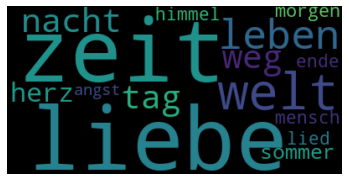

In [89]:
pop_nouns_text = ' '.join([noun for noun, count in pop_common_nouns]).lower()

wordcloud = WordCloud(prefer_horizontal=2).generate(pop_nouns_text)
# docs.post_
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

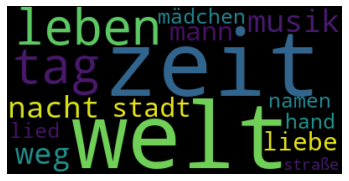

In [91]:
rap_nouns_text = ' '.join([noun for noun, count in rap_common_nouns]).lower()

wordcloud = WordCloud(prefer_horizontal=2).generate(rap_nouns_text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [31]:
# !pip install spacy_sentiws

In [ ]:
# https://spacy.io/universe/project/spacy-sentiws
# https://spacy.io/universe/project/spacy-textblob

In [79]:
sentiws_path = '../data/sentiws'
nlp.add_pipe("sentiws", config={"sentiws_path": sentiws_path})

In [80]:
df['positive_words'] = ''
df['negative_words'] = ''

for idx, row in df.iterrows():
    text = row['lyrics']
    positive_words = []
    negative_words = []
    doc = nlp(text)
    for token in doc:
        sentiment = token._.sentiws
        if isinstance(sentiment, float):
            if sentiment > 0:
                positive_words.append(token.text)
            elif sentiment < 0:
                negative_words.append(token.text)
    df.at[idx, 'positive_words'] = ', '.join(set(positive_words))
    df.at[idx, 'negative_words'] = ', '.join(set(negative_words))

In [22]:
df

,genre,interpret,album,release_year,songtitle,decade,song_id,full_title,release_date_components_raw,release_date_for_display,stats_raw,lyrics,weekday,word_count,positive_words,negative_words
0,NaN,Adel Tawil,NaN,2023,Fenster,0,9061124,Fenster by Adel Tawil,"{'year': 2023, 'month': 4, 'day': 28}",2023-04-28,"{'unreviewed_annotations': 0, 'hot': False}",Sitze an mei'm offenen Fenster Warte drauf d...,Friday,127,"Wissen, führen, Glück","aufgehört, brennt, fallen"
1,NaN,Adel Tawil,NaN,2023,Venus & Mars,0,8616439,Venus & Mars by Adel Tawil,"{'year': 2023, 'month': 3, 'day': 3}",2023-03-03,"{'unreviewed_annotations': 0, 'hot': False}",Nur einmal Wir sind Venus und Mars Einhunde...,Friday,100,Frieden,"Krieg, streiten"
2,NaN,Adel Tawil,NaN,2023,Spiegelbild,0,8616443,Spiegelbild by Adel Tawil,"{'year': 2023, 'month': 3, 'day': 3}",2023-03-03,"{'unreviewed_annotations': 0, 'hot': False}","Wie konnt ich glauben, dass es gut ist Dass ...",Friday,77,"verstanden, Duft, neuer","Dreck, Flucht"
3,NaN,Adel Tawil,NaN,2023,Nirvana,0,8616448,Nirvana by Adel Tawil,"{'year': 2023, 'month': 3, 'day': 3}",2023-03-03,"{'unreviewed_annotations': 0, 'hot': False}",Fahr' auf endlosen Straßen Weiter Richtung N...,Friday,147,Glück,"schlägt, Schließt, Ende, fehlt"
4,NaN,Adel Tawil,NaN,2023,Leuchten,0,8616445,Leuchten by Adel Tawil,"{'year': 2023, 'month': 3, 'day': 3}",2023-03-03,"{'unreviewed_annotations': 0, 'hot': False}",Wir hatten nur die größten Zeiten In jedem n...,Friday,78,"größten, freut","fehlt, kleiner, schlechten, unten, zweifelt"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7785,Schlager,Wolfgang Petry,Achterbahn,2001,Du hast mein Herz geklaut,2000,716319,Du hast mein Herz geklaut by Wolfgang Petry,NaN,NaN,"{'unreviewed_annotations': 0, 'hot': False}",Die Luft ist raus - ich glaub nicht mehr an W...,NaN,53,Wunder,
7786,Schlager,Wolfgang Petry,Achterbahn,2001,Leg dein Gesicht an mein Gesicht,2000,716326,Leg dein Gesicht an mein Gesicht by Wolfgang P...,NaN,NaN,"{'unreviewed_annotations': 0, 'hot': False}",Du wolltest deine Freiheit haben Nun stehst d...,NaN,51,"Sinn, Liebe, Freiheit",
7787,Schlager,Wolfgang Petry,Achterbahn,2001,Scheisse ist braun,2000,716331,Scheisse ist braun by Wolfgang Petry,NaN,NaN,"{'unreviewed_annotations': 0, 'hot': False}","Wenn die Sonne untergeht in der Provinz, ho h...",NaN,94,Verstand,untergeht
7788,Schlager,Wolfgang Petry,Kein Grund zur Panik,2003,Jetzt oder nie,2000,1447255,Mit offenen Armen by Wolfgang Petry,NaN,NaN,"{'unreviewed_annotations': 0, 'hot': False}",Wolfgang Petry - Anfang Vom Ende Lyrics Briefe...,NaN,50,Liebe,"Ende, gefehlt"


[('glück', 447), ('liebe', 335), ('freunde', 322), ('neue', 306), ('ziel', 278), ('sinn', 274), ('freund', 248), ('spaß', 238), ('macht', 217), ('große', 216), ('wahrheit', 209), ('feiern', 181), ('neuen', 176), ('freiheit', 170), ('beste', 168)]


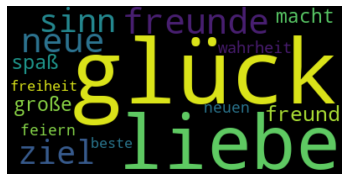

In [97]:
positive_words = ' '.join([word.lower() for word in df['positive_words']])
positive_word_list = positive_words.split(', ')

positive_word_count = Counter(positive_word_list)
most_common_positive_words = positive_word_count.most_common(15)
print(most_common_positive_words)

wordcloud = WordCloud(prefer_horizontal=2).generate_from_frequencies(dict(most_common_positive_words))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

[('angst', 552), ('ende', 549), ('krieg', 278), ('brennt', 221), ('dreck', 220), ('kleine', 220), ('unten', 219), ('problem', 219), ('tränen', 216), ('hass', 213), ('tod', 203), ('alte', 203), ('feuer', 179), ('schmerz', 174), ('bricht', 173)]


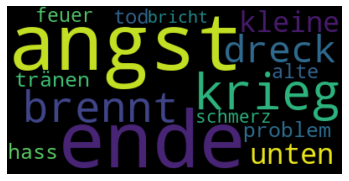

In [98]:
negative_words = ' '.join([word.lower() for word in df['negative_words']])
negative_words_list = negative_words.split(', ')

negative_word_count = Counter(negative_words_list)
most_common_negative_words = negative_word_count.most_common(15)
print(most_common_negative_words)

wordcloud = WordCloud(prefer_horizontal=2).generate_from_frequencies(dict(most_common_negative_words))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [68]:
word_counts = {}
for word in positive_word_list:
    if word in word_counts:
        word_counts[word] += 1
    else:
        word_counts[word] = 1

filtered_word_counts = {word: count for word, count in word_counts.items() if count >= 50}

words = list(filtered_word_counts.keys())
counts = list(filtered_word_counts.values())

fig = go.Figure(data=go.Scatter(
    x=words,
    y=counts,
    mode='markers',
    marker=dict(
        size=counts,
        sizemode='area',
        sizeref=max(counts) / 1000,
        color=counts,
        colorscale='thermal',
        showscale=True
    ),
))

fig.update_layout(
    title='Positive Words Bubble Chart (mindestens 50 Mal auftretende Wörter)',
    xaxis=dict(title='Words'),
    yaxis=dict(title='Counts'),
    showlegend=False
)

fig.show()


### Was ist das glücklichste Genre?

In [102]:
df = pd.read_csv('../data/unique_words_df.csv')

In [103]:
df

,unique_words
0,Zimmer
1,Story
2,Mal
3,Fehler
4,Tür
...,...
5939,Loubou
5940,Stimme
5941,fahren
5942,sing


Genre mit den meisten positiven Wörtern: Rap
